## Siemens - Data Exploration

In [1]:
import pandas as pd
import pathlib

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
plt.rcParams["figure.figsize"] = (24, 10)

sns.set_theme()

---

In [4]:
cwd = pathlib.Path().cwd()
data_path = cwd / "data"

In [5]:
[p.name for p in data_path.iterdir() if p.as_posix().endswith("csv")]

['events.csv',
 'disruptions.csv',
 'rssi.csv',
 'velocities.csv',
 'Mapping_Events_Disruptions.csv']

In [6]:
mapping_events_fpath = data_path / "Mapping_Events_Disruptions.csv"
events_fpath = data_path / "events.csv"
velocities_fpath = data_path / "velocities.csv"
disruptions_fpath = data_path / "disruptions.csv"
rssi_fpath = data_path / "rssi.csv"

---

### Mapping Events

In [7]:
mapping_events = pd.read_csv(mapping_events_fpath)

In [8]:
mapping_events.head()

,ID,EventDisruptionCode,DescriptionGerman,DescriptionEnglish,RelevantForChallenge,Notes
0,1,960862267,Stoerung: Zwangsbremse wurde aktiviert,Disruption: Emergency brake activated,x,NaN
1,2,960862267,Zwangsbremse wurde aktiviert,Emergency brake activated,x,NaN
2,3,960862258,Keine Linienleitertelegramme empfangen,No loop telegrams received,x,NaN
3,4,960862258,Stoerung: Linienleitertelegramme wurden erwart...,Disruption: loop telegrams expected but none r...,x,NaN
4,5,960862257,Position unverifiziert (Eichung falsch),Position not verified (wrong calibration),NaN,NaN


In [9]:
mapping_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   ID                    54 non-null     int64 
 1   EventDisruptionCode   54 non-null     int64 
 2   DescriptionGerman     54 non-null     object
 3   DescriptionEnglish    54 non-null     object
 4   RelevantForChallenge  7 non-null      object
 5   Notes                 6 non-null      object
dtypes: int64(2), object(4)
memory usage: 2.7+ KB


---

### Events

In [10]:
events = pd.read_csv(events_fpath)

In [11]:
events = events.assign(timestamp=pd.to_datetime(events.DateTime)
                       .map(pd.Timestamp)
                       .map(lambda t: t.timestamp()))

In [12]:
events.head()

,ID,DateTime,EventCode,Description,timestamp
0,352,2020-01-22 04:22:15,1698873063,Zwangsbremsung | Initialisierung,1.579667e+09
1,353,2020-01-22 04:23:11,977419008,Zugdaten bestaetigt: | Zuglaenge [dm]: 410 | B...,1.579667e+09
2,354,2020-01-22 09:52:49,977419008,Zugdaten bestaetigt: | Zuglaenge [dm]: 410 | B...,1.579687e+09
3,355,2020-01-22 09:55:37,1698873063,Zwangsbremsung | Initialisierung,1.579687e+09
4,356,2020-01-22 10:03:11,1698873063,Zwangsbremsung | Initialisierung,1.579687e+09


In [13]:
events.Description.unique()

array(['Zwangsbremsung | Initialisierung',
       'Zugdaten bestaetigt: | Zuglaenge [dm]: 410 | Bremswert  [%]: 110 | VMaxFzg [km/h]: 80',
       'Zwangsbremsung | Zugdaten', 'Rueckstellung der Zwangsbremse.',
       'Zugdaten geaendert: | Zuglaenge [dm]: 820 | Bremswert  [%]: 110 | VMaxFzg [km/h]: 80',
       'Zugdaten geaendert: | Zuglaenge [dm]: 410 | Bremswert  [%]: 110 | VMaxFzg [km/h]: 80',
       'Zugdaten geaendert: | Zuglaenge [dm]: 550 | Bremswert  [%]: 110 | VMaxFzg [km/h]: 80',
       'Bremstest wurde gestartet.',
       'Zugdaten geaendert: | Zuglaenge [dm]: 410 | Bremswert  [%]: 110 | VMaxFzg [km/h]: 50',
       'Ueberbrueckung: 1', 'Ueberbrueckung: 0',
       'Positionsstoerung ZSI0 | Ursache: Intialisierung',
       'Manuelle Positionseingabe. | Bereich Nr: 9 | Segment Nr: 9715 | Kilometrierung [m]: 9746 | Zuglage: Richtung Kilometrierung',
       'Manuelle Positionseingabe. | Bereich Nr: 9 | Segment Nr: 9861 | Kilometrierung [m]: 9900 | Zuglage: Richtung Kilometrierung

In [14]:
events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32972 entries, 0 to 32971
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           32972 non-null  int64  
 1   DateTime     32972 non-null  object 
 2   EventCode    32972 non-null  int64  
 3   Description  32972 non-null  object 
 4   timestamp    32972 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 1.3+ MB


---

### Disruptions

In [15]:
disruptions = pd.read_csv(disruptions_fpath)

In [16]:
disruptions.DateTime = pd.to_datetime(disruptions.DateTime)

In [17]:
disruptions = disruptions.assign(timestamp=disruptions.DateTime
                                 .map(pd.Timestamp)
                                 .map(lambda t: t.timestamp()))

In [18]:
disruptions.sample(10)

,ID,DateTime,DisruptionCode,Description,timestamp
867,1962,2020-08-21 17:06:28,960862267,Zwangsbremse wurde aktiviert,1.598030e+09
1567,5000,2021-03-16 03:10:27,960862267,Zwangsbremse wurde aktiviert,1.615864e+09
1969,5518,2021-05-21 02:36:26,960862267,Zwangsbremse wurde aktiviert,1.621565e+09
2113,5640,2021-06-25 05:25:20,960862267,Zwangsbremse wurde aktiviert,1.624599e+09
1225,3281,2020-11-19 16:20:59,960862267,Zwangsbremse wurde aktiviert,1.605803e+09
1161,2986,2020-11-02 03:24:26,960862267,Zwangsbremse wurde aktiviert,1.604287e+09
1957,5512,2021-05-19 16:37:11,960862267,Zwangsbremse wurde aktiviert,1.621442e+09
1481,4654,2021-02-10 04:25:50,960862267,Zwangsbremse wurde aktiviert,1.612931e+09
1234,3290,2020-11-23 02:42:21,960862267,Zwangsbremse wurde aktiviert,1.606099e+09
348,376,2020-04-17 05:13:26,960862267,Zwangsbremse wurde aktiviert,1.587100e+09


In [19]:
disruptions.Description.unique()

array(['Stoerung: Zwangsbremse wurde aktiviert',
       'Stoerung: Linienleitertelegramme wurden erwartet, jedoch auf beiden Antennen keine empfangen.',
       'Stoerung: Position unverifiziert (Eichung falsch)',
       'Stoerung: ZSI0 Modus (Position unbekannt)',
       'Zwangsbremse wurde aktiviert',
       'Keine Linienleitertelegramme empfangen',
       'Position unverifiziert (Eichung falsch)',
       'Position unbekannt (ZSI0)', 'Hardwarefehler Bediengeraet',
       'Hardwarefehler Verteiler', 'Datei geloescht'], dtype=object)

In [20]:
disruptions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2117 entries, 0 to 2116
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   ID              2117 non-null   int64         
 1   DateTime        2117 non-null   datetime64[ns]
 2   DisruptionCode  2117 non-null   int64         
 3   Description     2117 non-null   object        
 4   timestamp       2117 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 82.8+ KB


---

### Velocities

In [21]:
import random

In [22]:
n_entries = 29_772_325
sample_size = 10_000
skiprows = random.sample(range(1,n_entries), k=n_entries - sample_size)

In [23]:
# Load the entire csv
# velocities = pandas.read_csv(velocities_fpath)

# Partially load the csv (it's 1+GB)
velocities = pd.read_csv(velocities_fpath, skiprows=skiprows)

In [24]:
velocities.DateTime = pd.to_datetime(velocities.DateTime)

In [25]:
velocities = velocities.assign(timestamp=velocities.DateTime
                               .map(pd.Timestamp)
                               .map(lambda t: t.timestamp()))

In [26]:
velocities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   ID                  10000 non-null  int64         
 1   DateTime            10000 non-null  datetime64[ns]
 2   CurrentVelocity     10000 non-null  int64         
 3   AllowedVelocity     10000 non-null  int64         
 4   EmergencyStopLimit  10000 non-null  int64         
 5   timestamp           10000 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(4)
memory usage: 468.9 KB


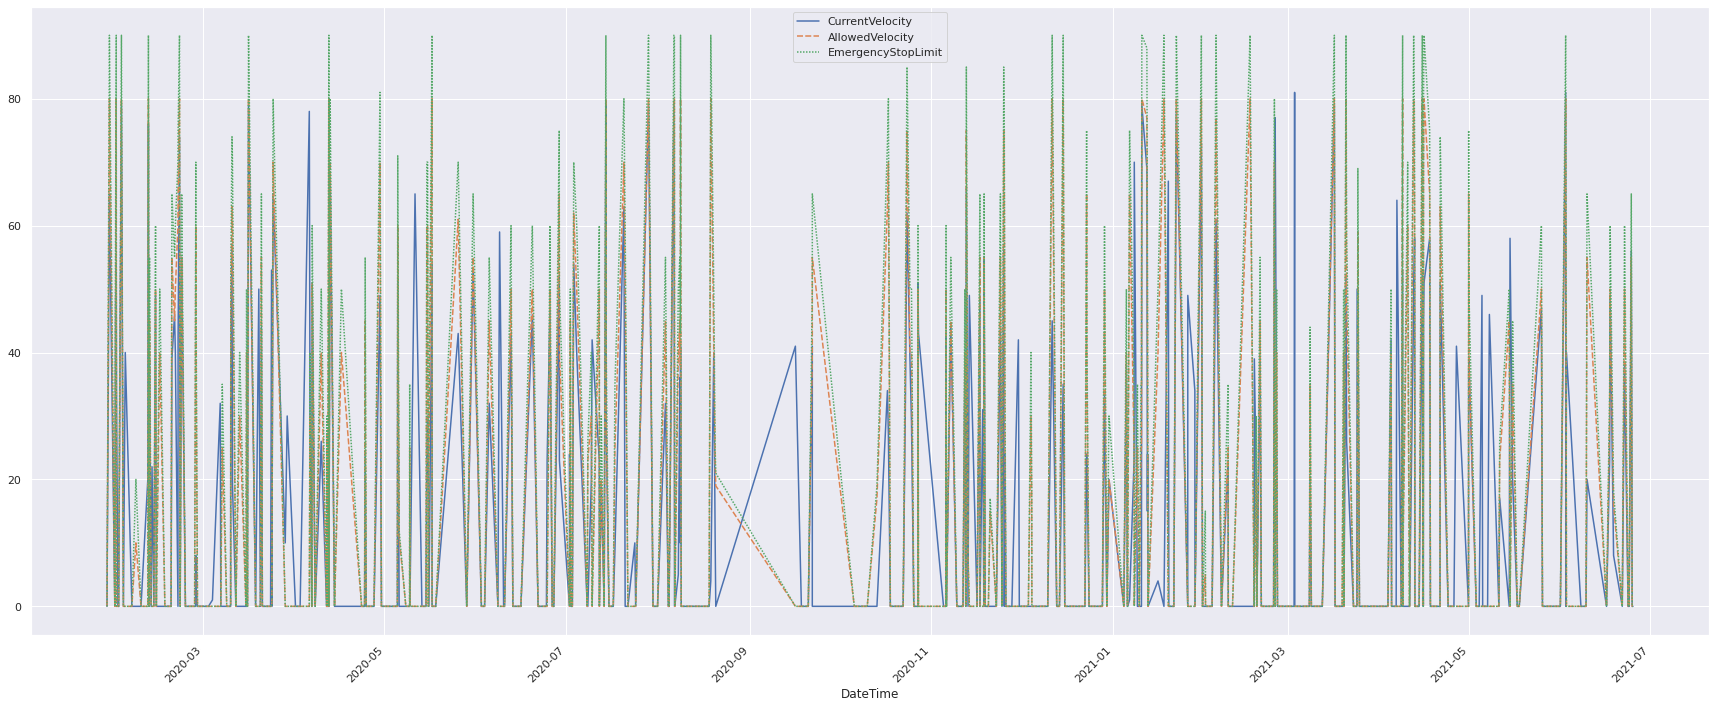

In [27]:
fig = plt.figure(figsize=(24,10))
_ = sns.lineplot(data = velocities.set_index("DateTime").drop(["ID", "timestamp"], axis=1).sample(5_00), figure=fig)
_ = plt.xticks(rotation=45, ha="right")
_ = plt.tight_layout()

---

### RSSI

In [28]:
n_entries_rssi = 30_975_729
sample_size_rssi = 10_000
skiprows_rssi = random.sample(range(1,n_entries_rssi), k=n_entries_rssi - sample_size_rssi)

In [29]:
rssi = pd.read_csv(rssi_fpath, skiprows=skiprows_rssi)

In [30]:
rssi.DateTime = pd.to_datetime(rssi.DateTime)

In [31]:
rssi = rssi.assign(timestamp=rssi.DateTime
                   .map(pd.Timestamp)
                   .map(lambda t: t.timestamp()))

In [32]:
# 0 and 3 are special values for the RSSI signal - ignore those values
rssi = rssi[(rssi.A2_RSSI > 0.0) & (rssi.A2_RSSI < 3.0)]

In [33]:
rssi.head()

,ID,DateTime,AreaNumber,Track,Position,PositionNoLeap,Latitude,Longitude,A1_TotalTel,A1_ValidTel,A2_RSSI,A2_TotalTel,A2_ValidTel,timestamp
0,600,2021-01-09 00:10:00,38,1,372830,379580,47.277262,8.160172,1757581,1734083,2.37,1556632,1552438,1.610151e+09
1,14938,2021-01-09 04:08:58,40,2,420442,427192,47.241035,8.189314,1823188,1799690,2.23,1622232,1618038,1.610165e+09
2,21956,2021-01-09 06:05:56,35,1,357785,364535,47.280887,8.145628,1855307,1831804,2.43,1654351,1650153,1.610172e+09
3,22453,2021-01-09 06:14:13,29,2,311497,318247,47.313588,8.113419,1857669,1834159,0.07,1656716,1652516,1.610173e+09
4,22923,2021-01-09 06:22:03,25,2,254385,261135,47.361250,8.099751,1859889,1836379,2.40,1658930,1654727,1.610173e+09


In [34]:
rssi.describe()

,ID,AreaNumber,Track,Position,PositionNoLeap,Latitude,Longitude,A1_TotalTel,A1_ValidTel,A2_RSSI,A2_TotalTel,A2_ValidTel,timestamp
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,1.000000e+04,10000.000000,1.000000e+04,1.000000e+04,1.000000e+04
mean,1.544725e+07,23.330800,6.609100,258755.167400,244565.617400,47.309348,8.099909,5.715592e+05,5.671946e+05,2.184371,5.202405e+05,5.193358e+05,1.602253e+09
std,8.979042e+06,12.476479,19.166112,145622.811921,132109.998327,0.050998,0.059652,8.111314e+05,8.023751e+05,0.478888,7.400048e+05,7.390543e+05,1.299954e+07
min,6.000000e+02,9.000000,1.000000,97072.000000,97072.000000,47.240273,8.041301,0.000000e+00,0.000000e+00,0.070000,0.000000e+00,0.000000e+00,1.579677e+09
25%,7.749788e+06,9.000000,1.000000,99011.000000,99011.000000,47.257088,8.050041,9.798200e+04,9.710750e+04,2.160000,8.335450e+04,8.306400e+04,1.591011e+09
50%,1.535965e+07,20.000000,2.000000,200365.500000,200365.500000,47.305725,8.054561,2.324590e+05,2.315820e+05,2.340000,2.175875e+05,2.171240e+05,1.603444e+09
75%,2.315563e+07,38.000000,3.000000,420633.000000,408211.250000,47.355628,8.181601,6.613618e+05,6.544605e+05,2.470000,5.703925e+05,5.693010e+05,1.613193e+09
max,3.101702e+07,40.000000,203.000000,555042.000000,428065.000000,47.393751,8.189586,4.649594e+06,4.643948e+06,2.980000,4.496112e+06,4.492403e+06,1.624607e+09


In [35]:
rssi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   ID              10000 non-null  int64         
 1   DateTime        10000 non-null  datetime64[ns]
 2   AreaNumber      10000 non-null  int64         
 3   Track           10000 non-null  int64         
 4   Position        10000 non-null  int64         
 5   PositionNoLeap  10000 non-null  int64         
 6   Latitude        10000 non-null  float64       
 7   Longitude       10000 non-null  float64       
 8   A1_TotalTel     10000 non-null  int64         
 9   A1_ValidTel     10000 non-null  int64         
 10  A2_RSSI         10000 non-null  float64       
 11  A2_TotalTel     10000 non-null  int64         
 12  A2_ValidTel     10000 non-null  int64         
 13  timestamp       10000 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(9)
memory usage

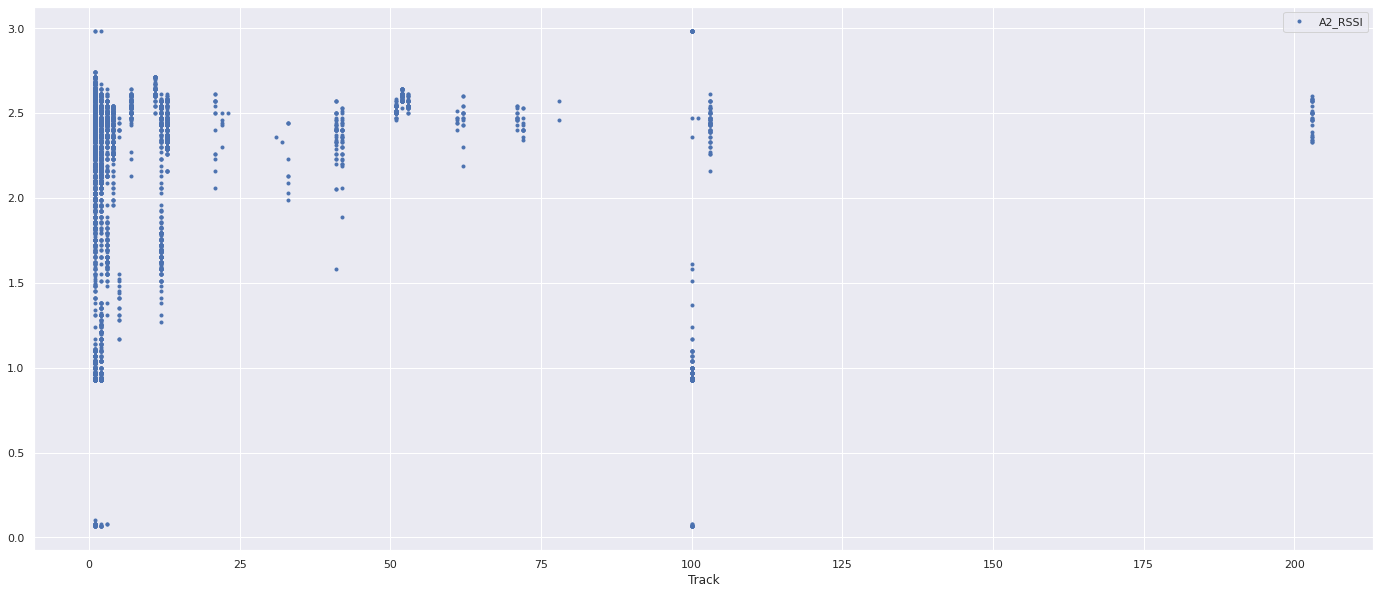

In [36]:
_ = rssi.set_index("Track")["A2_RSSI"].plot(style=".")
_ = plt.legend()

In [37]:
tel_diff_a1 = rssi.sort_values("DateTime").set_index("DateTime").A1_TotalTel - rssi.sort_values("DateTime").set_index("DateTime").A1_ValidTel

<AxesSubplot:xlabel='DateTime'>

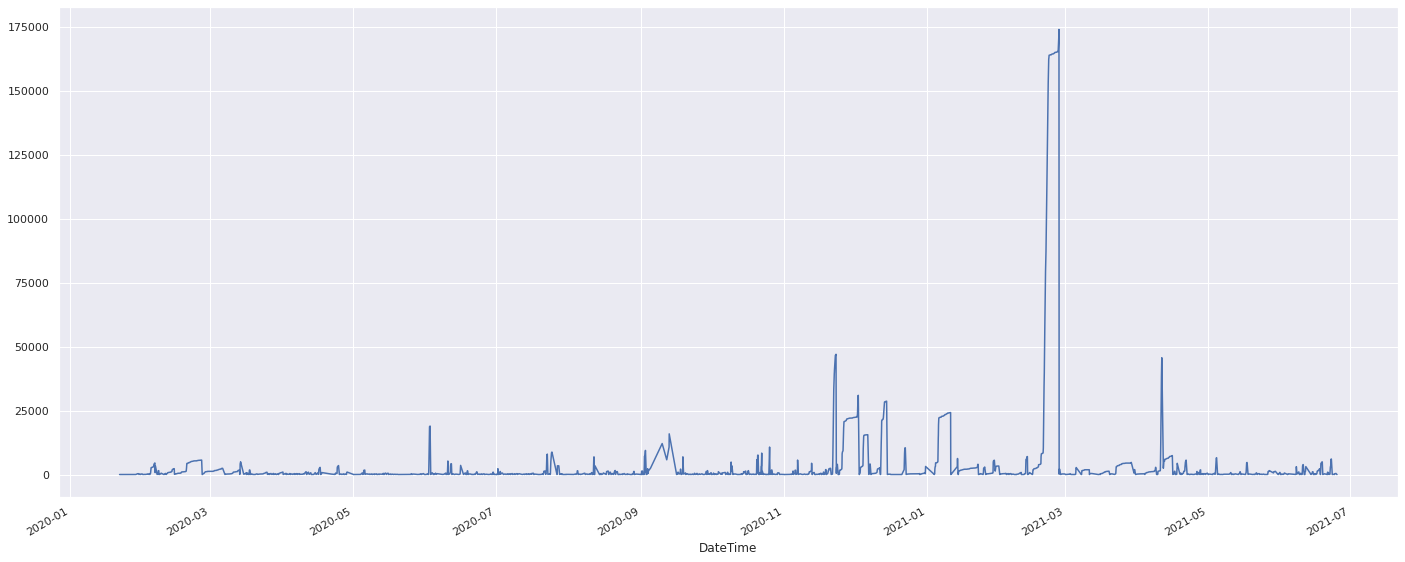

In [38]:
tel_diff_a1.plot()

---

In [39]:
N = 500

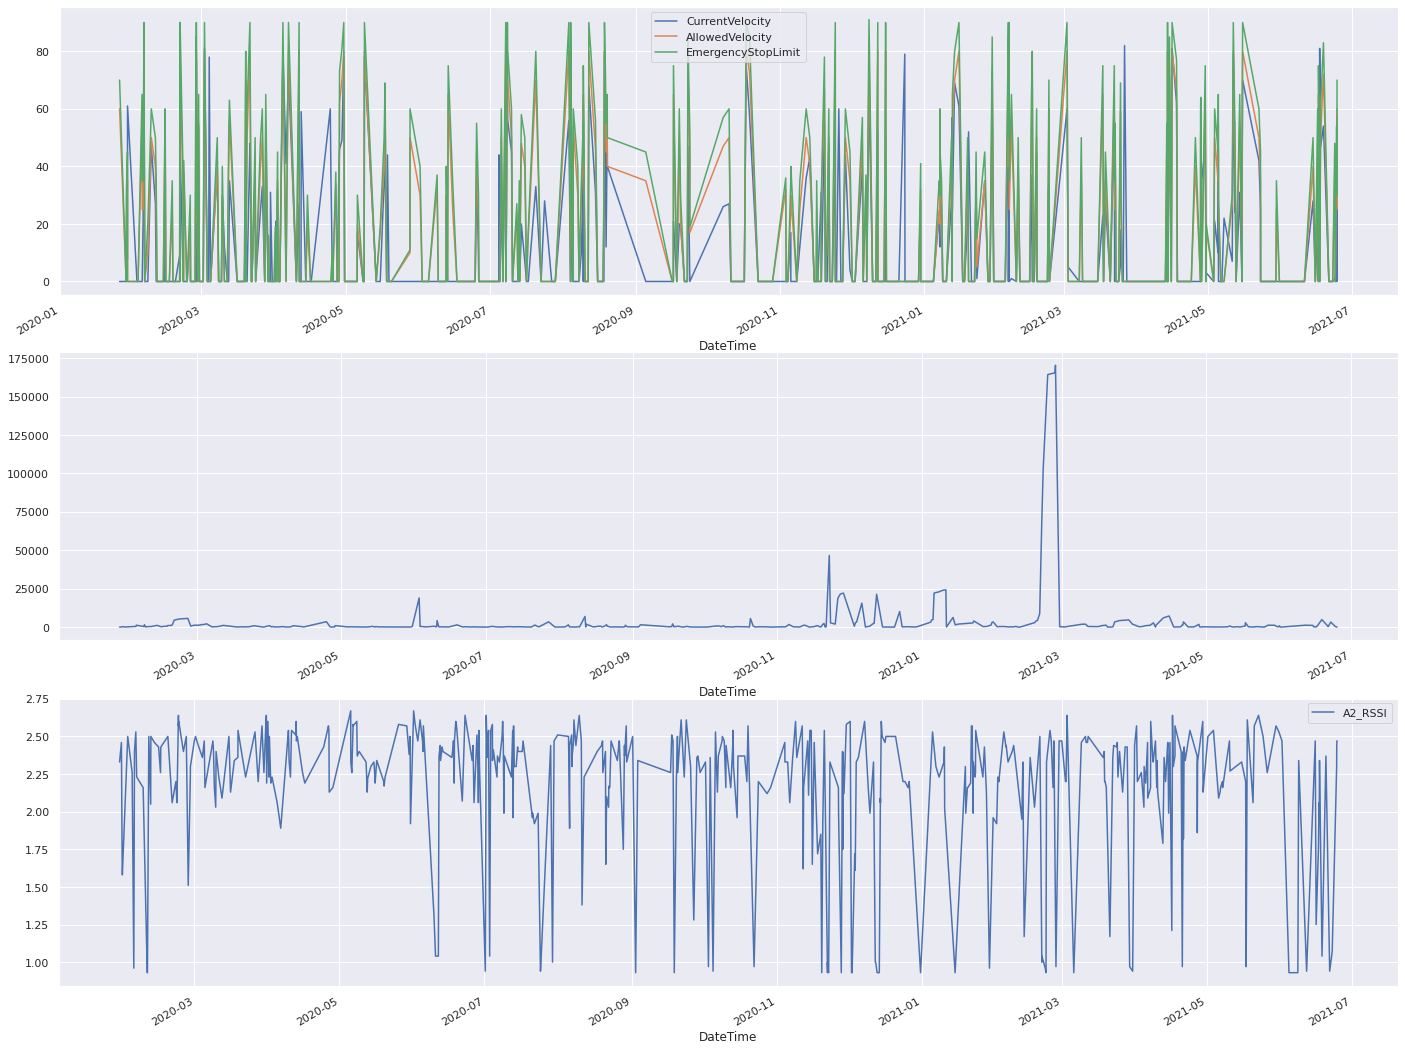

In [40]:
fig, ax = plt.subplots(3,1, figsize=(24,20))
velocities.set_index("DateTime").drop(["ID", "timestamp"], axis=1).sample(N).plot(ax=ax[0])
rssi.set_index("DateTime").sample(N)[["A2_RSSI"]].plot(ax=ax[2])
# rssi.set_index("DateTime").sample(N)[["A1_ValidTel", "A1_TotalTel"]].plot(ax=ax[1])
_rssi = rssi.set_index("DateTime").sample(N)
(_rssi.A1_TotalTel - _rssi.A1_ValidTel).plot(ax=ax[1], label = "Total - Valid packets")
mean_vel = velocities.AllowedVelocity.mean()
for i, disruption in disruptions.drop(["timestamp"], axis=1).sample(10).iterrows():
    _ = plt.annotate(disruption["Description"], 
                     xy=(disruption["DateTime"], 0), 
                     rotation=-35, 
                     va='bottom', ha='center',
                     arrowprops=dict(arrowstyle="->", color="black"), figure=fig)